# 1. 데이터 둘러보기.

## 칼럼 설명
: dacon에서 제공하는 데이터의 칼럼의 설명

* Date : 1981.05.01 ~ 2022.08.31 까지의 날짜
* Close : 종가 (종료 시 가격)
* Open : 시가 (시작 시 가격)
* High : 고가 (가장 높은 가격)
* Low : 저가 (가장 낮은 가격)
* Volume : 거래량 (매매된 주식의 수 (ex) 주)
* Change : 등락률 (전일대비 등락률, 일정한 기간에 어떠한 기준 값이 오르거나 내리는 비율 - 음수이면 전일대비 떨어진 것이고, 양수이면 전일대비 오른 것이다.)<br/>
(cf) 등락률 = (현재 종가 - 전일 종가) / 전일 종가, 전월비(%) = 등락률 x 100

In [91]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [92]:
df=pd.read_csv("kospi_data.csv")
df.head()

,Date,Close,Open,High,Low,Volume,Change
0,1981-05-01,123.6,123.6,123.6,123.6,3330000.0,0.0098
1,1981-05-02,123.5,123.5,123.5,123.5,2040000.0,-0.0008
2,1981-05-04,120.6,120.6,120.6,120.6,1930000.0,-0.0235
3,1981-05-06,120.7,120.7,120.7,120.7,1690000.0,0.0008
4,1981-05-07,119.3,119.3,119.3,119.3,1480000.0,-0.0116


In [93]:
df_copy=df.copy()
df_copy.head()

,Date,Close,Open,High,Low,Volume,Change
0,1981-05-01,123.6,123.6,123.6,123.6,3330000.0,0.0098
1,1981-05-02,123.5,123.5,123.5,123.5,2040000.0,-0.0008
2,1981-05-04,120.6,120.6,120.6,120.6,1930000.0,-0.0235
3,1981-05-06,120.7,120.7,120.7,120.7,1690000.0,0.0008
4,1981-05-07,119.3,119.3,119.3,119.3,1480000.0,-0.0116


In [94]:
df_copy.dtypes

Date       object
Close     float64
Open      float64
High      float64
Low       float64
Volume    float64
Change    float64
dtype: object

In [95]:
df_copy.isnull().sum() # 결측치는 없습니다.

Date      0
Close     0
Open      0
High      0
Low       0
Volume    0
Change    0
dtype: int64

In [96]:
df_copy.shape

(11024, 7)

In [97]:
df_copy.describe()

,Close,Open,High,Low,Volume,Change
count,11024.000000,11024.000000,11024.000000,11024.000000,1.102400e+04,11024.000000
mean,1121.077967,1121.552291,1127.448217,1114.365044,2.556932e+08,0.000379
std,772.891667,773.393378,777.129136,768.310046,2.938432e+08,0.014550
min,105.990000,105.990000,105.990000,105.990000,1.660000e+05,-0.120200
25%,586.562500,586.482500,589.730000,582.837500,1.208750e+07,-0.006300
50%,878.105000,878.015000,882.360000,873.430000,2.264900e+08,0.000300
75%,1891.347500,1892.090000,1902.320000,1880.635000,4.028000e+08,0.007200
max,3305.210000,3305.460000,3316.080000,3295.440000,3.460000e+09,0.119500


In [98]:
df_copy.describe(include="object")

,Date
count,11024
unique,11024
top,1981-05-01
freq,1


### 범주형 변수 vs 수치형 변수

* [범주형 변수] : Date - 범주를 나눠서 그래프를 그릴 수 있습니다.
* [수치형 변수] : Close, Open, High, Low, Volumn, Change - 통계적 수치를 이용하여 그래프를 그릴 수 있습니다.

In [99]:
print("데이터의 개수는 {} 개 입니다.".format(df_copy.shape[0]*df_copy.shape[1]))
print("데이터의 결측치의 개수는 {} 개 입니다.".format(df_copy.isnull().sum().sum()))

데이터의 개수는 77168 개 입니다.
데이터의 결측치의 개수는 0 개 입니다.


# 2. 데이터 정비하기.

## 2-1. 칼럼 모두 소문자로 변경하기.

칼럼을 모두 소문자로 통일하는 것이 데이터 분석 시에 더 편리합니다.

In [100]:
df_copy.columns=df_copy.columns.str.lower()
df_copy.columns

Index(['date', 'close', 'open', 'high', 'low', 'volume', 'change'], dtype='object')

In [101]:
df_copy.head()

,date,close,open,high,low,volume,change
0,1981-05-01,123.6,123.6,123.6,123.6,3330000.0,0.0098
1,1981-05-02,123.5,123.5,123.5,123.5,2040000.0,-0.0008
2,1981-05-04,120.6,120.6,120.6,120.6,1930000.0,-0.0235
3,1981-05-06,120.7,120.7,120.7,120.7,1690000.0,0.0008
4,1981-05-07,119.3,119.3,119.3,119.3,1480000.0,-0.0116


## 2-2. 전월비 칼럼 생성하기.

In [102]:
df_copy["monthly ratio"]=df_copy["change"]*100
df_copy.head()

,date,close,open,high,low,volume,change,monthly ratio
0,1981-05-01,123.6,123.6,123.6,123.6,3330000.0,0.0098,0.98
1,1981-05-02,123.5,123.5,123.5,123.5,2040000.0,-0.0008,-0.08
2,1981-05-04,120.6,120.6,120.6,120.6,1930000.0,-0.0235,-2.35
3,1981-05-06,120.7,120.7,120.7,120.7,1690000.0,0.0008,0.08
4,1981-05-07,119.3,119.3,119.3,119.3,1480000.0,-0.0116,-1.16


# 2-3. date 칼럼을 datetime 으로 변경해주기.

In [103]:
df_copy["date"]=pd.to_datetime(df_copy["date"])

In [104]:
df_copy.dtypes

date             datetime64[ns]
close                   float64
open                    float64
high                    float64
low                     float64
volume                  float64
change                  float64
monthly ratio           float64
dtype: object

## 2-4. date 칼럼을 연도, 월, 일, 요일로 쪼개주기.

In [105]:
df_copy["year"]=df_copy["date"].dt.year
df_copy["month"]=df_copy["date"].dt.month
df_copy["day"]=df_copy["date"].dt.day
df_copy["dayofweek"]=df_copy["date"].dt.day_name()

In [106]:
df_copy.head()

,date,close,open,high,low,volume,change,monthly ratio,year,month,day,dayofweek
0,1981-05-01,123.6,123.6,123.6,123.6,3330000.0,0.0098,0.98,1981,5,1,Friday
1,1981-05-02,123.5,123.5,123.5,123.5,2040000.0,-0.0008,-0.08,1981,5,2,Saturday
2,1981-05-04,120.6,120.6,120.6,120.6,1930000.0,-0.0235,-2.35,1981,5,4,Monday
3,1981-05-06,120.7,120.7,120.7,120.7,1690000.0,0.0008,0.08,1981,5,6,Wednesday
4,1981-05-07,119.3,119.3,119.3,119.3,1480000.0,-0.0116,-1.16,1981,5,7,Thursday


# 3. EDA & Visualization

In [107]:
import os

In [108]:
sns.set_style("darkgrid")
plt.rcParams["axes.unicode_minus"]=False

In [109]:
if os.name=="nt":
    plt.rcParams["font.family"]="Malgun Gothic"

In [110]:
df_copy.head()

,date,close,open,high,low,volume,change,monthly ratio,year,month,day,dayofweek
0,1981-05-01,123.6,123.6,123.6,123.6,3330000.0,0.0098,0.98,1981,5,1,Friday
1,1981-05-02,123.5,123.5,123.5,123.5,2040000.0,-0.0008,-0.08,1981,5,2,Saturday
2,1981-05-04,120.6,120.6,120.6,120.6,1930000.0,-0.0235,-2.35,1981,5,4,Monday
3,1981-05-06,120.7,120.7,120.7,120.7,1690000.0,0.0008,0.08,1981,5,6,Wednesday
4,1981-05-07,119.3,119.3,119.3,119.3,1480000.0,-0.0116,-1.16,1981,5,7,Thursday


In [111]:
df_copy["year"].unique()

array([1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991,
       1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002,
       2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013,
       2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022], dtype=int64)

In [114]:
df_max=df_copy.groupby(["year", "month"])["volume"].max().reset_index()
df_max

,year,month,volume
0,1981,5,3.330000e+06
1,1981,6,4.160000e+06
2,1981,7,3.010000e+06
3,1981,8,1.670000e+06
4,1981,9,1.240000e+06
...,...,...,...
491,2022,4,1.740000e+09
492,2022,5,1.330000e+09
493,2022,6,8.148800e+08
494,2022,7,5.303400e+08


In [115]:
df_min=df_copy.groupby(["year", "month"])["volume"].min().reset_index()
df_min

,year,month,volume
0,1981,5,543000.0
1,1981,6,1170000.0
2,1981,7,485000.0
3,1981,8,230000.0
4,1981,9,308000.0
...,...,...,...
491,2022,4,962400.0
492,2022,5,469800000.0
493,2022,6,422130000.0
494,2022,7,295620000.0


In [118]:
df_copy["month"].unique()

array([ 5,  6,  7,  8,  9, 10, 11, 12,  1,  2,  3,  4], dtype=int64)

array([ 0.,  2.,  4.,  6.,  8., 10., 12., 14.])

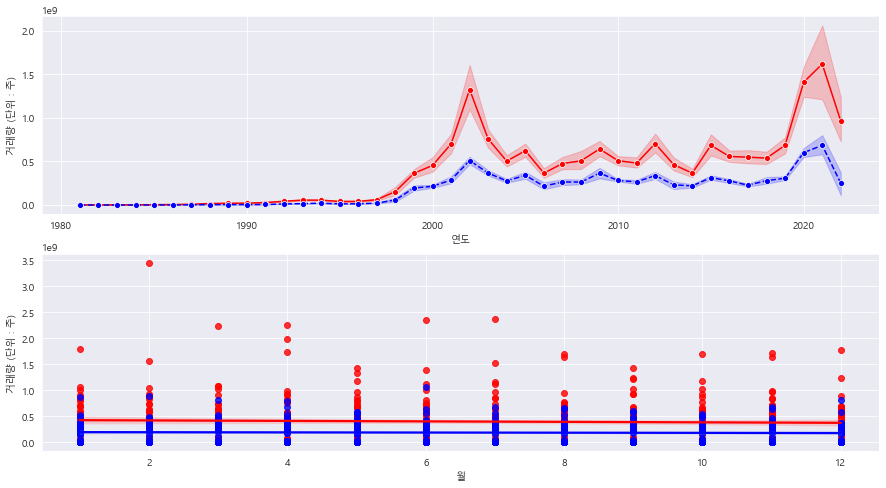

In [117]:
fig, ax=plt.subplots(2, 1, figsize=(15,8))

_=sns.lineplot(data=df_max, x="year", y="volume", ax=ax[0], marker="o", color="red")
_=sns.regplot(data=df_max, x="month", y="volume", ax=ax[1], color="red")
_=sns.lineplot(data=df_min.reset_index(), x="year", y="volume", ax=ax[0], marker="o", linestyle="--", color="blue")
_=sns.regplot(data=df_min, x="month", y="volume", ax=ax[1], color="blue")

_=ax[0].set_xlabel("연도")
_=ax[0].set_ylabel("거래량 (단위 : 주)")
_=ax[1].set_xlabel("월")
_=ax[1].set_ylabel("거래량 (단위 : 주)")
_=ax[0].set_title("")